<a href="https://colab.research.google.com/github/shreyamali01/CS203_Lab04/blob/main/CS203_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Task 1 : Setup the Dataset**

Installing Required Libraries

In [ ]:
#datasets for loading MNIST from Hugging Face
#numpy for array manipulation
#sklearn for data splitting
!pip install -q datasets numpy scikit-learn

Loading the MNIST Dataset

In [ ]:
from datasets import load_dataset
import numpy as np

#loading MNIST dataset
mnist = load_dataset("mnist")

#extracting the images and labels
train_data = mnist["train"]
test_data = mnist["test"]

#converting images to numpy arrays
X_train = np.array(train_data["image"])
y_train = np.array(train_data["label"])
X_test = np.array(test_data["image"])
y_test = np.array(test_data["label"])

#printing shapes to verify
print("training set shape:", X_train.shape, y_train.shape)
print("testing set shape:", X_test.shape, y_test.shape)

training set shape: (60000, 28, 28) (60000,)
testing set shape: (10000, 28, 28) (10000,)


Normalizing the Image Data

In [ ]:
#normalizing pixel values in the range [0,1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Flattening Each Image into a vector of 784 Features


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("flattened training set shape:", X_train.shape)
print("flattened testing set shape:", X_test.shape)

flattened training set shape: (60000, 784)
flattened testing set shape: (10000, 784)


Dataset into Training and Testing Set

In [ ]:
print("final training set shape:", X_train.shape, y_train.shape)
print("final testing set shape:", X_test.shape, y_test.shape)

final training set shape: (60000, 784) (60000,)
final testing set shape: (10000, 784) (10000,)


Randomly selecting an initially labeled dataset of 200 samples from training samples


In [ ]:
#selecting a random seed for reproducibility
np.random.seed(42)

#randomly selecting 200 indices from the training set
labeled_indices = np.random.choice(len(X_train), size=200, replace=False)

#creating the labeled dataset with 200 samples
X_labeled = X_train[labeled_indices]
y_labeled = y_train[labeled_indices]

#removing the selected 200 samples from the training set to form the unlabeled pool
X_unlabeled = np.delete(X_train, labeled_indices, axis=0)
y_unlabeled = np.delete(y_train, labeled_indices, axis=0)

#checking the shapes of the labeled and unlabeled datasets
print("labeled dataset shape:", X_labeled.shape)
print("unlabeled pool shape:", X_unlabeled.shape)

labeled dataset shape: (200, 784)
unlabeled pool shape: (59800, 784)


Creating 3 copies of X_labeled, y_labeled, X_unlabeled, and y_unlabeled for Task 2, Task 3 and Task 4

In [ ]:
#copy1
X_labeled1 = X_labeled.copy()
y_labeled1 = y_labeled.copy()
X_unlabeled1 = X_unlabeled.copy()
y_unlabeled1 = y_unlabeled.copy()

#copy2
X_labeled2 = X_labeled.copy()
y_labeled2 = y_labeled.copy()
X_unlabeled2 = X_unlabeled.copy()
y_unlabeled2 = y_unlabeled.copy()

#copy3
X_labeled3 = X_labeled.copy()
y_labeled3 = y_labeled.copy()
X_unlabeled3 = X_unlabeled.copy()
y_unlabeled3 = y_unlabeled.copy()

###**Task 2 : Implement Random Sampling for Active Learning**

Training a Random Forest Classifier on the initial dataset of 200 samples

In [ ]:
#importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#initializing Random Forest Classifier
rf_classifier1 = RandomForestClassifier(random_state=42)

#training the classifier on the initial labeled dataset
rf_classifier1.fit(X_labeled1, y_labeled1)

RandomForestClassifier(random_state=42)

Implementing Active Learning loop for 20 iterations

In [ ]:
#empty list for stories the accuracy values
random_sampling_accuracies = []

for iteration in range(20):
  #randomly selecting a sample from the unlabeled pool
  idx = np.random.choice(len(X_unlabeled1))

  #getting the selected sample and its true label
  X_selected1 = X_unlabeled1[idx]
  y_selected1 = y_unlabeled1[idx]

  #adding the selected sample and its label to the labeled dataset
  X_labeled1 = np.vstack([X_labeled1, X_selected1])  #adding new sample to labeled dataset
  y_labeled1 = np.append(y_labeled1, y_selected1)    #adding its label to labeled dataset

  #removing the selected sample from the unlabeled dataset
  X_unlabeled1 = np.delete(X_unlabeled1, idx, axis=0)
  y_unlabeled1 = np.delete(y_unlabeled1, idx, axis=0)

  #retraining the model with the updated labeled dataset
  rf_classifier1.fit(X_labeled1, y_labeled1)

  #predict on the test set
  y_pred = rf_classifier1.predict(X_test)

  #claculating accuracy on the test set
  accuracy1 = accuracy_score(y_test, y_pred)
  random_sampling_accuracies.append(accuracy1)

  #printing accuracy on each iteration
  print(f"Iteration {iteration + 1}: Accuracy = {accuracy1:.4f}")

Iteration 1: Accuracy = 0.8195
Iteration 2: Accuracy = 0.8175
Iteration 3: Accuracy = 0.8222
Iteration 4: Accuracy = 0.8196
Iteration 5: Accuracy = 0.8182
Iteration 6: Accuracy = 0.8188
Iteration 7: Accuracy = 0.8232
Iteration 8: Accuracy = 0.8261
Iteration 9: Accuracy = 0.8266
Iteration 10: Accuracy = 0.8303
Iteration 11: Accuracy = 0.8264
Iteration 12: Accuracy = 0.8242
Iteration 13: Accuracy = 0.8281
Iteration 14: Accuracy = 0.8206
Iteration 15: Accuracy = 0.8251
Iteration 16: Accuracy = 0.8292
Iteration 17: Accuracy = 0.8223
Iteration 18: Accuracy = 0.8136
Iteration 19: Accuracy = 0.8181
Iteration 20: Accuracy = 0.8159


###**Task 3 : Implement Uncertainty Sampling for Active Learning**

Training a Random Forest Classifier on the initial dataset of 200 samples

In [ ]:
#importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#initializing Random Forest Classifier
rf_classifier2 = RandomForestClassifier(random_state=42)

#training the classifier on the initial labeled dataset
rf_classifier2.fit(X_labeled2, y_labeled2)

RandomForestClassifier(random_state=42)

Function to compute uncertainty

In [ ]:
#function to calculate entropy
def entropy(probs):
    entropy_value = -np.sum(probs * np.log(probs + 1e-9), axis=1)   #avoiding log0 by adding a small value
    return entropy_value

#computing uncertainty using entropy
def compute_uncertainty(X_unlabeled, model):
    probs = model.predict_proba(X_unlabeled)                        #getting probability predictions
    uncertainties = entropy(probs.T)                                #computing entropy for each sample
    return uncertainties

Implementing Active Learning loop for 20 iterations

In [ ]:
#empty list for stories the accuracy values
uncertainty_sampling_accuracies = []

for iteration in range(20):

  #computing uncertainty for each sample in the unlabeled pool
  uncertainties = compute_uncertainty(X_unlabeled2, rf_classifier2)

  #selecting the sample with the highest uncertainty
  max_uncertainty_idx = np.argmax(uncertainties)

  #getting the selected sample and its true label
  X_selected2 = X_unlabeled2[max_uncertainty_idx]
  y_selected2 = y_unlabeled2[max_uncertainty_idx]

  #adding the selected sample and its label to the labeled dataset
  X_labeled2 = np.vstack([X_labeled2, X_selected2])  #adding new sample to labeled dataset
  y_labeled2 = np.append(y_labeled2, y_selected2)    #adding its label to labeled dataset

  #removing the selected sample from the unlabeled dataset
  X_unlabeled2 = np.delete(X_unlabeled2, max_uncertainty_idx, axis=0)
  y_unlabeled2 = np.delete(y_unlabeled2, max_uncertainty_idx, axis=0)

  #retraining the model with the updated labeled dataset
  rf_classifier2.fit(X_labeled2, y_labeled2)

  #predict on the test set
  y_pred = rf_classifier2.predict(X_test)

  #claculating accuracy on the test set
  accuracy2 = accuracy_score(y_test, y_pred)
  uncertainty_sampling_accuracies.append(accuracy2)

  #printing accuracy on each iteration
  print(f"Iteration {iteration + 1}: Accuracy = {accuracy2:.4f}")

Iteration 1: Accuracy = 0.8346
Iteration 2: Accuracy = 0.8276
Iteration 3: Accuracy = 0.8291
Iteration 4: Accuracy = 0.8272
Iteration 5: Accuracy = 0.8251
Iteration 6: Accuracy = 0.8235
Iteration 7: Accuracy = 0.8298
Iteration 8: Accuracy = 0.8282
Iteration 9: Accuracy = 0.8271
Iteration 10: Accuracy = 0.8286
Iteration 11: Accuracy = 0.8292
Iteration 12: Accuracy = 0.8222
Iteration 13: Accuracy = 0.8281
Iteration 14: Accuracy = 0.8247
Iteration 15: Accuracy = 0.8268
Iteration 16: Accuracy = 0.8259
Iteration 17: Accuracy = 0.8266
Iteration 18: Accuracy = 0.8320
Iteration 19: Accuracy = 0.8309
Iteration 20: Accuracy = 0.8311


###**Task 4 : Implement Query-by-Committee for Active Learning**

Initializing a Committe to 5 models

In [ ]:
#creating a committee of 5 models
committee = [RandomForestClassifier(n_estimators=100, random_state=(42+i)) for i in range(5)]

#training all the models on initial dataset
for model in committee:
  model.fit(X_labeled3, y_labeled3)

Defining the vote entropy function

In [ ]:
def vote_entropy(committee_predictions):
  num_samples = committee_predictions.shape[1]
  vote_entropy_scores = np.zeros(num_samples)

  for i in range(num_samples):
    votes = committee_predictions[:, i]
    unique_votes, counts = np.unique(votes, return_counts=True)
    probs = counts / np.sum(counts)

  return vote_entropy

 Implementing Query-by-Committee for Active Learning loop for 20 iterations


In [ ]:
#empty list for stories the accuracy values
committee_sampling_accuracies = []

for iteration in range(20):

  #get predictions from all the members of the committee
  committee_preds = np.array([model.predict(X_unlabeled3) for model in committee])

  #computing vote entropy for each sample
  disagreement = vote_entropy(committee_preds)

  #selecting the sample with the highest uncertainty
  max_disagreement_idx = np.argmax(disagreement)

  #getting the selected sample and its true label
  X_selected3 = X_unlabeled3[max_uncertainty_idx]
  y_selected3 = y_unlabeled3[max_uncertainty_idx]

  #adding the selected sample and its label to the labeled dataset
  X_labeled3 = np.vstack([X_labeled3, X_selected3])  #adding new sample to labeled dataset
  y_labeled3 = np.append(y_labeled3, y_selected3)    #adding its label to labeled dataset

  #removing the selected sample from the unlabeled dataset
  X_unlabeled3 = np.delete(X_unlabeled3, max_uncertainty_idx, axis=0)
  y_unlabeled3 = np.delete(y_unlabeled3, max_uncertainty_idx, axis=0)

  #retraining the model with the updated labeled dataset
  for model in committee:
    model.fit(X_labeled3, y_labeled3)

  #calculating accuracy on the test set using the first model in the committee
  y_pred = committee[0].predict(X_test)
  accuracy3 = accuracy_score(y_test, y_pred)
  committee_sampling_accuracies.append(accuracy3)

  #printing accuracy on each iteration
  print(f"Iteration {iteration + 1}: Accuracy = {accuracy3:.4f}")

Iteration 1: Accuracy = 0.8124
Iteration 2: Accuracy = 0.8183
Iteration 3: Accuracy = 0.8255
Iteration 4: Accuracy = 0.8230
Iteration 5: Accuracy = 0.8193
Iteration 6: Accuracy = 0.8219
Iteration 7: Accuracy = 0.8231
Iteration 8: Accuracy = 0.8228
Iteration 9: Accuracy = 0.8200
Iteration 10: Accuracy = 0.8225
Iteration 11: Accuracy = 0.8251
Iteration 12: Accuracy = 0.8238
Iteration 13: Accuracy = 0.8277
Iteration 14: Accuracy = 0.8218
Iteration 15: Accuracy = 0.8269
Iteration 16: Accuracy = 0.8253
Iteration 17: Accuracy = 0.8282
Iteration 18: Accuracy = 0.8249
Iteration 19: Accuracy = 0.8241
Iteration 20: Accuracy = 0.8258


###**Task 5 : Final Model Acuracy**

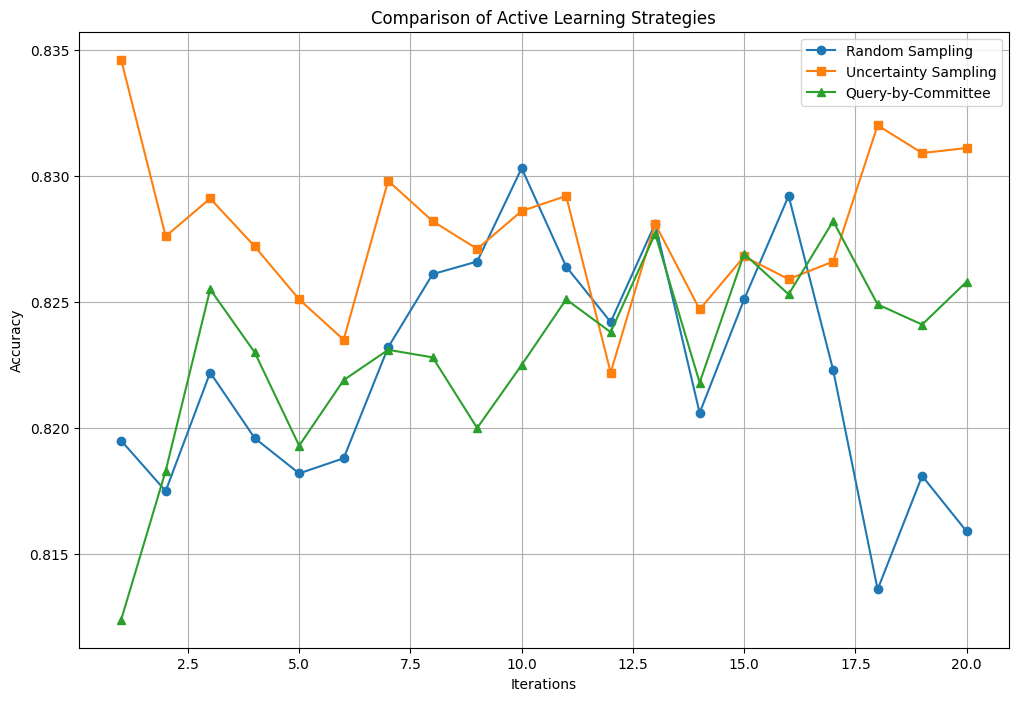

In [ ]:
#importing required libraries
import matplotlib.pyplot as plt

#1-to-20 iterations
iterations = list(range(1, 21))

#plot size
plt.figure(figsize=(12, 8))

#plotting accuracy for each stratergy
plt.plot(iterations, random_sampling_accuracies, label="Random Sampling", marker="o")
plt.plot(iterations, uncertainty_sampling_accuracies, label="Uncertainty Sampling", marker="s")
plt.plot(iterations, committee_sampling_accuracies, label="Query-by-Committee", marker="^")

#adding title
plt.title("Comparison of Active Learning Strategies")

#adding labels
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

#adding legend
plt.legend(loc="upper right")

#adding grid
plt.grid(True)